### 2.2 Correlation between stats <a class="anchor" id="corr"></a> [<font size="1">▲</font>](#Content-table)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.category import UnitData

sns.set_style("whitegrid")

In [29]:
df = pd.read_csv("monsters.csv")

In [30]:
#adding the saves
def find_save(arg1, arg2):
    #if the save is null (arg2) it means the monster has no alternative save, thus falling onto stat mod derived save
    if arg2 == 0:
        return arg1
    else: 
        return arg2

for stat in ['str', 'dex', 'con','int', 'wis', 'cha']:
    df[stat+"_save_f"] = df.apply(lambda x: find_save(x[stat+"_mod"], x[stat+"_save"]), axis=1)

In [31]:
#additional comodities
str_cr_order = ['0', '1/8', '1/4', '1/2', '1', '2', '3', '4', '5', '6',
                '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                '17', '19', '20', '21', '22', '23', '24', '30']
numeric_size = {'Large': 4, 'Medium' : 3, 'Huge': 5, 
    'Gargantuan': 6, 'Small' : 2, 'Tiny' : 1
    }

#### Correlation between main stats, all creatures

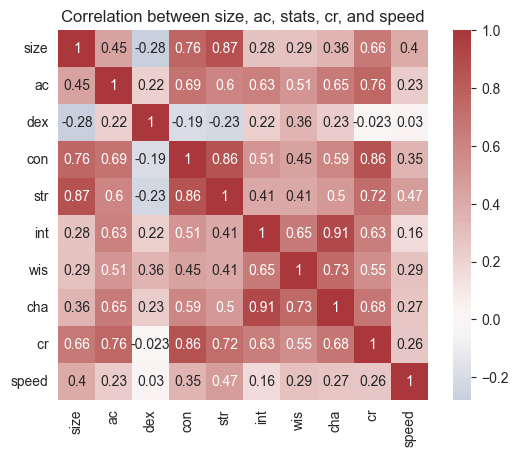

In [32]:
columns = ['size', 'ac', 'dex', 'con','str', 'int',
           'wis','cha', 'numeric_cr', 'speed'
          ]
dfc = df[columns].copy(deep=True)
dfc["size"] = dfc["size"].apply(lambda size : numeric_size[size])
dfc = dfc.rename(columns={"numeric_cr": "       cr"})
corrmatt = dfc.corr()
hm = sns.heatmap(corrmatt, 
                 cbar=True, 
                 annot=True, 
                 center = 0, 
                 square = True, 
                 cmap="vlag")
plt.title("Correlation between size, ac, stats, cr, and speed")
plt.show()

#### Correlation between saves, all creatures

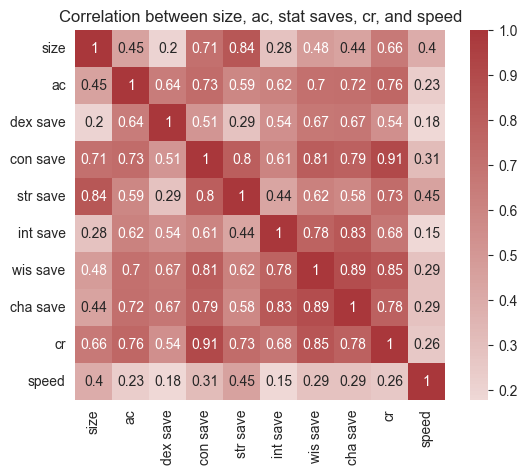

In [33]:
columns = ['size', 'ac', 
           'dex_save_f', 'con_save_f', 'str_save_f', 'int_save_f', 'wis_save_f','cha_save_f',
           'numeric_cr', 'speed'
          ]
dfcf = df[columns].copy(deep=True)
dfcf["size"] = dfcf["size"].apply(lambda size : numeric_size[size])
dfcf = dfcf.rename(columns={'dex_save_f' : 'dex save', 
                            'con_save_f' : 'con save',
                            'str_save_f' : 'str save',  
                            'int_save_f' : 'int save',  
                            'wis_save_f' : 'wis save', 
                            'cha_save_f' : 'cha save', 
                            'numeric_cr' : "cr"
                           })
corrmat = dfcf.corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True, square = True, robust= True, center = 0, cmap="vlag")

plt.title("Correlation between size, ac, stat saves, cr, and speed")
plt.show()

#### Correlation stats & saves focus 

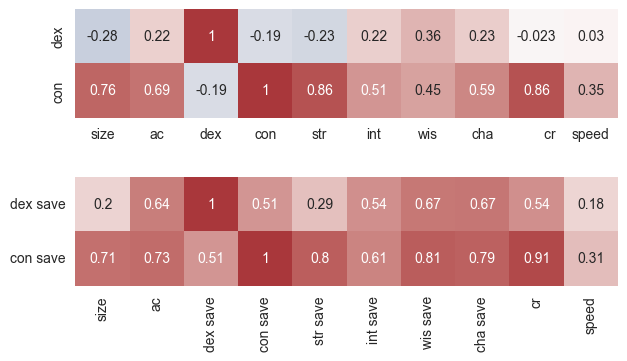

In [34]:
fig = plt.figure(figsize =(7, 4))
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
sns.heatmap(corrmatt.loc[['dex', 'con']], cbar=False, annot=True, center = 0, square = True, cmap="vlag", ax= ax1)
sns.heatmap(corrmat.loc[['dex save', 'con save']], cbar=False, annot=True, square = True, robust= True, center = 0, cmap="vlag", ax= ax2)
plt.show()

#### Dexterity by Cr level

In [35]:
df_val_counts = pd.DataFrame(df.value_counts(["cr", "dex"])).reset_index()
df_val_counts.columns = ['cr', 'dex', 'count']

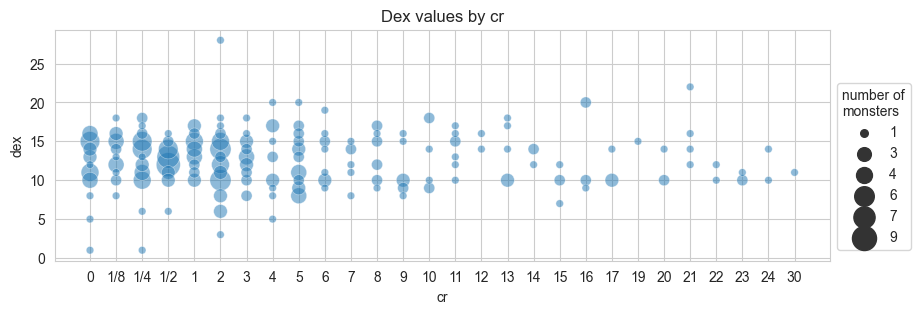

In [37]:
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "cr", y = "dex", size = "count", xunits=UnitData(str_cr_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Dex values by cr")
plt.legend(bbox_to_anchor=(1, 0.8), title = "number of\nmonsters")
plt.show()

In [38]:
df_val_counts = pd.DataFrame(df.value_counts(["cr", "con"])).reset_index()
df_val_counts.columns = ['cr', 'con', 'count']

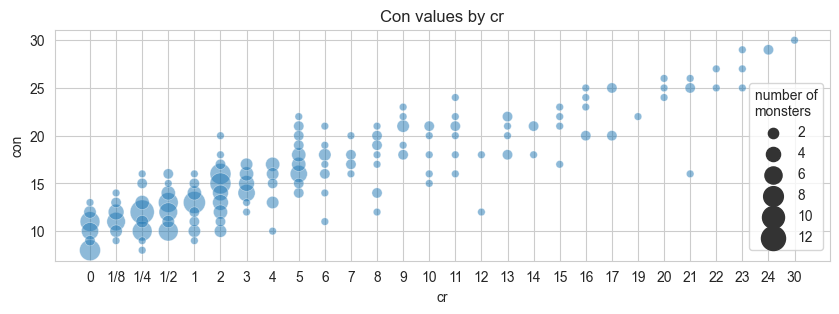

In [39]:
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "cr", y = "con", size = "count", xunits=UnitData(str_cr_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Con values by cr")
plt.legend(bbox_to_anchor=(1, 0.8), title = "number of\nmonsters")
plt.show()

In [10]:
df[df.dex_save != df.dex_mod][["name", 'dex', 'dex_mod', "dex_save" ]].head(3)

,name,dex,dex_mod,dex_save
0,Aboleth,9,-1,0
2,Adult Black Dragon,14,2,7
3,Adult Blue Dragon,10,0,5


In [40]:
import dataframe_image as dfi
df_styled = df[df.dex_save != df.dex_mod][["name", 'dex', 'dex_mod', "dex_save" ]].head(3)
dfi.export(df_styled,"mods_vs_save_table.png")

### Dexterity save by Cr level

In [11]:
df_val_counts = pd.DataFrame(df.value_counts(["cr", "dex_save_f"])).reset_index()
df_val_counts.columns = ['cr', 'dex_save_f', 'count']

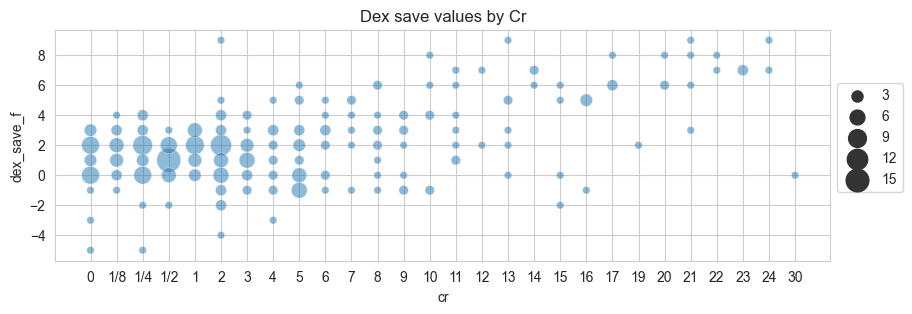

In [12]:
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "cr", y = "dex_save_f", size = "count", xunits=UnitData(str_cr_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Dex save values by Cr");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()

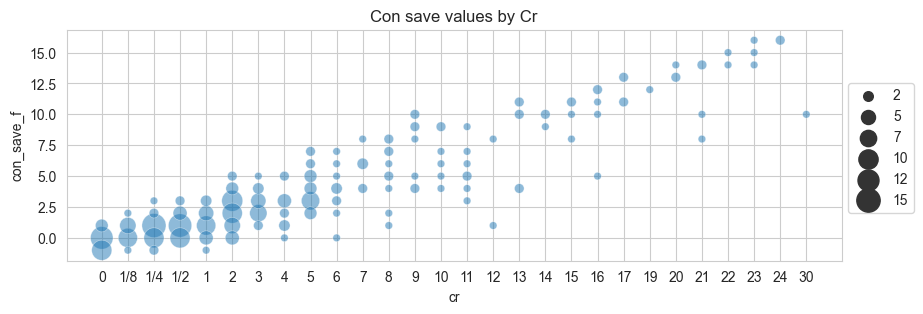

In [41]:
df_val_counts = pd.DataFrame(df.value_counts(["cr", "con_save_f"])).reset_index()
df_val_counts.columns = ['cr', 'con_save_f', 'count']
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "cr", y = "con_save_f", size = "count", xunits=UnitData(str_cr_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Con save values by Cr");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()

#### Distribution visualisation

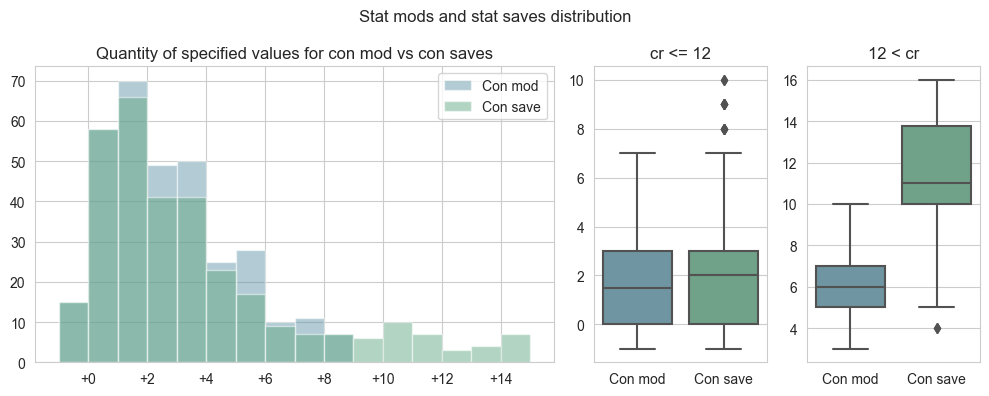

In [75]:
cr_n = 12
c_m = '#69A' #mod color
c_s = "#6A8" #save_f color
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), width_ratios=[3, 1, 1]) #, sharey=True

df["con_mod"].hist( bins = [x for x in range(df["con_mod"].min(),df["con_mod"].max())],
                      label = "Con mod", color = c_m, alpha = 0.5, ax = axes[0])

df["con_save_f"].hist( bins = [x for x in range(df["con_save_f"].min(),df["con_save_f"].max())],
                      label = "Con save", color = c_s, alpha = 0.5, ax = axes[0])

sns.boxplot(data=df[['con_mod', 'con_save_f']][df.numeric_cr> cr_n], 
            palette = [c_m,c_s], ax = axes[2])
sns.boxplot(data=df[['con_mod', 'con_save_f']][df.numeric_cr<= cr_n], 
            palette = [c_m,c_s], ax = axes[1])


axes[0].set_title(f"Quantity of specified values for con mod vs con saves")
axes[0].set_xticks(range(0,15, 2)); axes[0].set_xticklabels(["+"+str(x) for x in range(0,15, 2)])
axes[0].legend()
axes[2].set_title(f"{cr_n} < cr")
axes[1].set_title(f"cr <= {cr_n}")
plt.setp(axes[2], xticklabels=['Con mod', 'Con save'])
plt.setp(axes[1], xticklabels=['Con mod', 'Con save'])

plt.suptitle("Stat mods and stat saves distribution")
plt.tight_layout()
plt.show()

#### Mean stats DEX and CON by cr

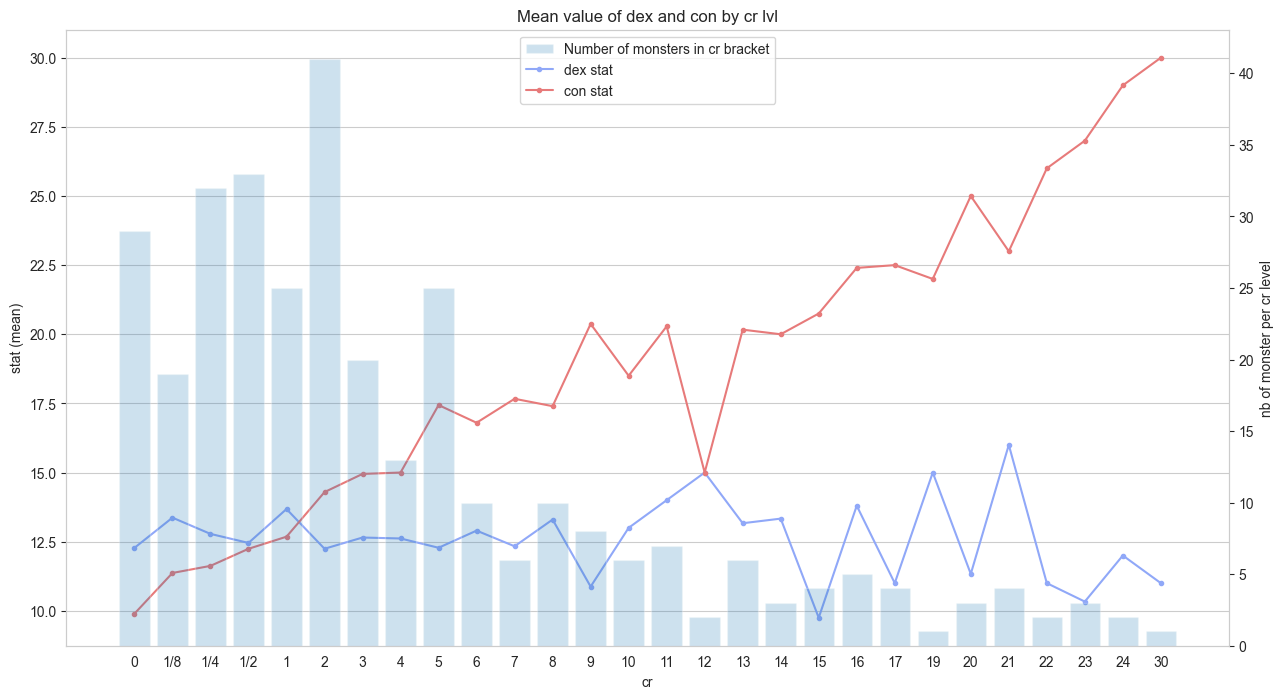

In [47]:
fig, ax1 = plt.subplots(figsize=(15, 8))

#saves lines plotting from twinx copying
ld, = ax1.plot(df.groupby('cr')[['dex']].mean().reindex(labels = str_cr_order),
              color = "#90a8f8", marker = ".", label = "dex stat")
lc, = ax1.plot(df.groupby('cr')[['con']].mean().reindex(labels = str_cr_order),
              color = "#e77a7a", marker = ".", label = "con stat")
ax1.set_ylabel('stat (mean)')
ax1.xaxis.grid(False)
ax1.set_xlabel('cr')

#creating bar plot for count in every cr
ax2 = ax1.twinx()
cr_counts = df["cr"].value_counts()
b = ax2.bar(x = cr_counts.index,
        height = cr_counts.values,
        alpha = 0.22, label = "Number of monsters in cr bracket", width=0.8, 
        xunits=UnitData(str_cr_order)
       )
ax2.set_ylabel('nb of monster per cr level')
ax2.grid(False)
plt.legend(handles = [b, ld, lc], loc= "upper center")
plt.title("Mean value of dex and con by cr lvl")
plt.show()

#### Mean DEX and CON saves by cr

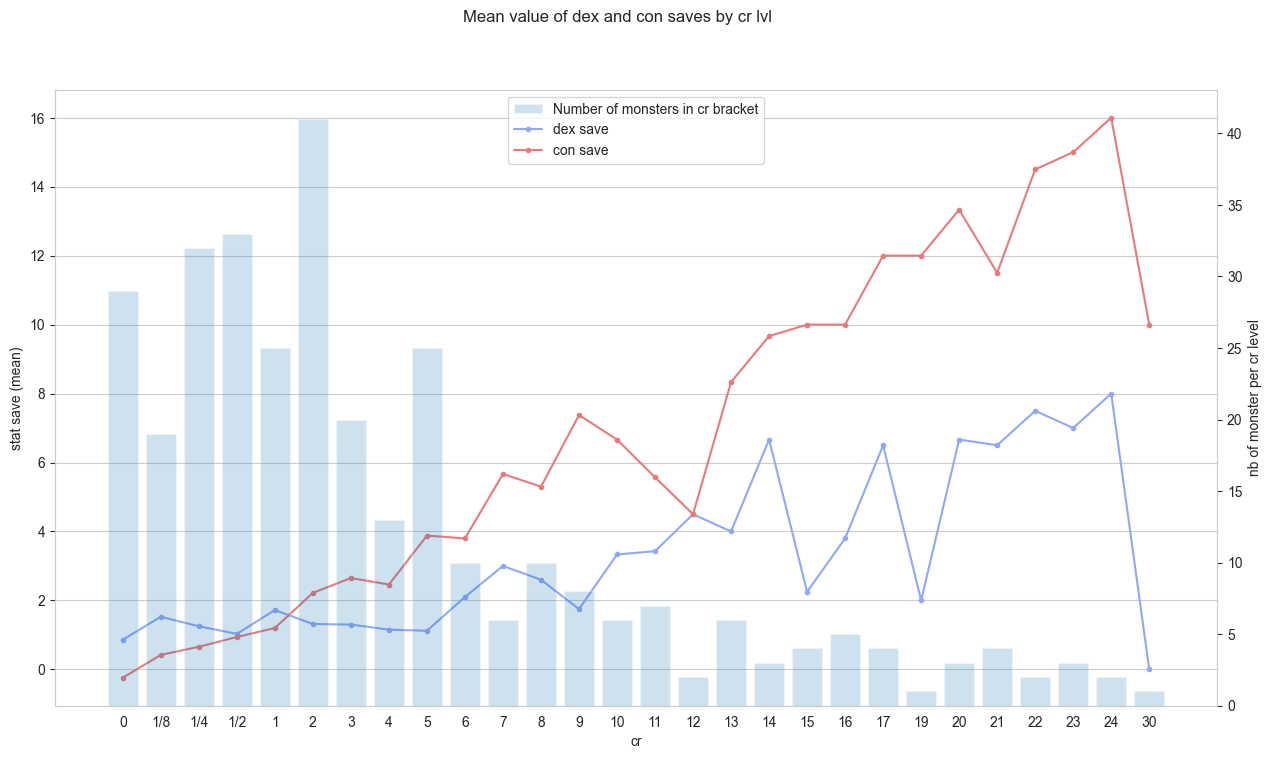

In [46]:
fig, ax1 = plt.subplots(figsize=(15, 8))

#saves lines plotting from twinx copying
ld, = ax1.plot(df.groupby('cr')[['dex_save_f']].mean().reindex(labels = str_cr_order),
              color = "#90a8f8", marker = ".", label = "dex save")
lc, = ax1.plot(df.groupby('cr')[['con_save_f']].mean().reindex(labels = str_cr_order),
              color = "#e77a7a", marker = ".", label = "con save")
ax1.set_ylabel('stat save (mean)')
ax1.xaxis.grid(False)
ax1.set_xlabel('cr')

#creating bar plot for count in every cr
ax2 = ax1.twinx()
cr_counts = df["cr"].value_counts()
b = ax2.bar(x = cr_counts.index,
        height = cr_counts.values,
        alpha = 0.22, label = "Number of monsters in cr bracket", width=0.8, 
        xunits=UnitData(str_cr_order)
       )
ax2.set_ylabel('nb of monster per cr level')
ax2.grid(False)
plt.legend(handles = [b, ld, lc], loc= "upper center")
plt.suptitle("Mean value of dex and con saves by cr lvl")
plt.show()

#### Percentage of monsters where DEX vs CON saves comparison is equal to mean DEX vs CON saves comparison

In [16]:
dfc = df.copy(deep = True)
def dex_con_finder(dexs, cons):
    if dexs < cons:
        return 0
    elif dexs == cons:
        return 1
    else:
        return 2

dfc["dex_higher_than_con"] = dfc.apply( lambda x: dex_con_finder(x.dex_save_f, x.con_save_f), axis = 1)

In [17]:
dex_mean = df.groupby('cr')[['dex_save_f']].mean()
con_mean = df.groupby('cr')[['con_save_f']].mean()

In [18]:
dfc["mean_dex"] = dfc["cr"].apply(lambda x: dex_mean.loc[x])
dfc["mean_con"] = dfc["cr"].apply(lambda x: con_mean.loc[x])
dfc["mean_dex_h_than_mean_con"] = dfc.apply( lambda x: dex_con_finder(x.mean_dex, x.mean_con), axis = 1)

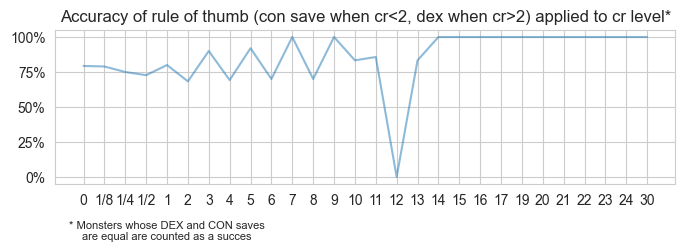

Total accuracy of our rule of thumb on all monsters: 80.2%


In [19]:
accuracy_per_cr = []
for cr_ in str_cr_order:
    acc = dfc.loc[dfc.cr == cr_].loc[(dfc.dex_higher_than_con == dfc.mean_dex_h_than_mean_con) | (dfc.dex_higher_than_con == 1) ].shape[0]\
          / dfc.loc[dfc.cr == cr_].shape[0]
    accuracy_per_cr.append(acc)
fig = plt.figure(figsize =(8, 2))
plt.plot(str_cr_order, accuracy_per_cr, alpha = 0.5)
plt.yticks([0,0.25,0.5,0.75,1], labels = ["0%","25%","50%","75%", "100%"])
plt.title("Accuracy of rule of thumb (con save when cr<2, dex when cr>2) applied to cr level*")
plt.text(4,-0.45, "* Monsters whose DEX and CON saves\nare equal are counted as a succes", size=8, ha="center")
plt.show()

print(f"Total accuracy of our rule of thumb on all monsters: {round(dfc.loc[(dfc.dex_higher_than_con == dfc.mean_dex_h_than_mean_con) | (dfc.dex_higher_than_con == 1)].shape[0]/ dfc.shape[0],3)*100}%")


## Others

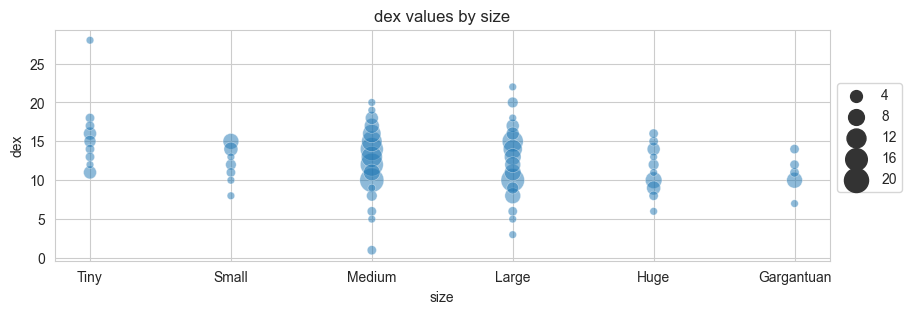

In [48]:
df_val_counts = pd.DataFrame(df.value_counts(["size", "dex"])).reset_index()
df_val_counts.columns = ['size', 'dex', 'count']
s_order = ['Tiny', 'Small', 'Medium','Large','Huge', 'Gargantuan']
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "size", y = "dex", size = "count", xunits=UnitData(s_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("dex values by size");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()

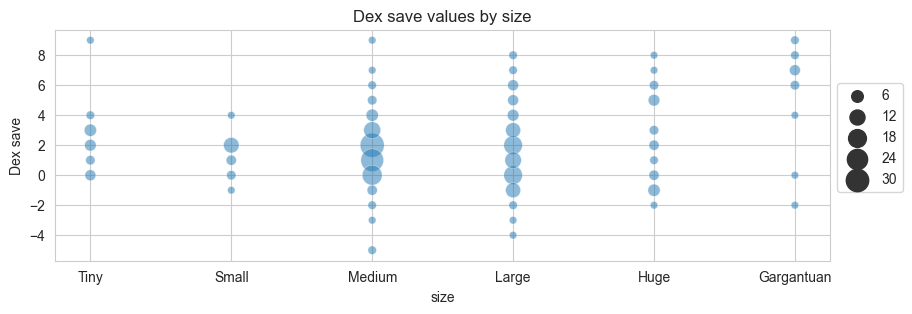

In [51]:
df_val_counts = pd.DataFrame(df.value_counts(["size", "dex_save_f"])).reset_index()
df_val_counts.columns = ['size', 'Dex save', 'count']
s_order = ['Tiny', 'Small', 'Medium','Large','Huge', 'Gargantuan']
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "size", y = "Dex save", size = "count", xunits=UnitData(s_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Dex save values by size");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()

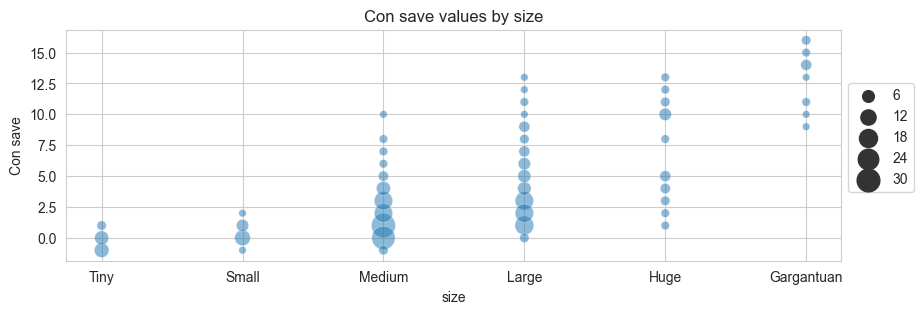

In [76]:
df_val_counts = pd.DataFrame(df.value_counts(["size", "con_save_f"])).reset_index()
df_val_counts.columns = ['size', 'Con save', 'count']
s_order = ['Tiny', 'Small', 'Medium','Large','Huge', 'Gargantuan']
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "size", y = "Con save", size = "count", xunits=UnitData(s_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Con save values by size");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()